In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

data = pd.read_csv('Mall_Customers.csv')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

sil_score = silhouette_score(X_scaled, y_kmeans)
db_score = davies_bouldin_score(X_scaled, y_kmeans)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Score:", db_score)

Silhouette Score: 0.46658474419000145
Davies-Bouldin Score: 0.716482156943549


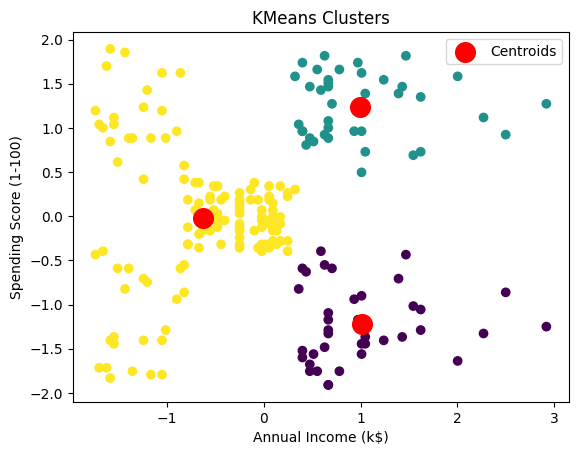

In [2]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('KMeans Clusters')
plt.legend()
plt.show()